# Exploritary Data Analysis - House Prices

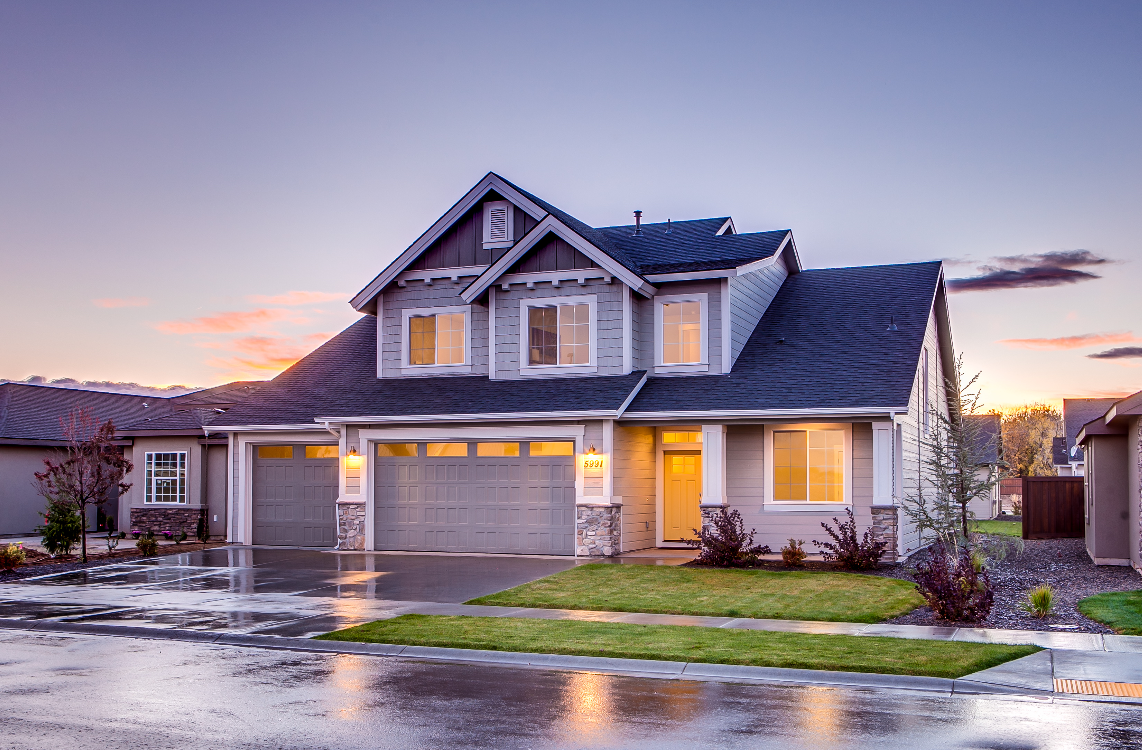

## summary

* **Problem:** Predicting Housing Prices in Ames, Iowa
* **Data:**
    * 79 Features
    * Training set has 1460 exapmles & Evaluation has 1459 examples
    * Data in CSV format
* **Framing the Problem:**
    * Supervised Learning
    * Regression
    * Evaluation Metric: Root Mean Squared Error (RMSE)


## 1. Libaries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import EDA_Script as eda

## 2. Raw Data

In [2]:
FOLDERNAME = '/Users/carlosfarfangalindo/Library/CloudStorage/Dropbox/Mac/Desktop/Github/Learning-Machine-Learning-with-House_Prices_Challenge/Data/Raw_Data'
train = pd.read_csv(FOLDERNAME + '/train.csv')
test = pd.read_csv(FOLDERNAME + '/test.csv')
submission_data = pd.read_csv(FOLDERNAME + '/sample_submission.csv')

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 3. Missing Values

Table and Visualization

In [5]:
eda.Overview_Missing_Values(train)

,Null Values,Percentage Null Values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [6]:
# eda.Analyse_Features(train,test,"SalePrice","HouseStyle")

Not Enough Unique Values

In [7]:
eda.Overview_Unique_Values(train,0.90)

VALUE: Pave = 99.58904109589041%
Pave    1454
Grvl       6
Name: Street, dtype: int64
---------------------
Value: Null = 93.76712328767123%
Grvl    50
Pave    41
Name: Alley, dtype: int64
---------------------
VALUE: NoSeWa = 99.93150684931507%
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
---------------------
VALUE: Sev = 94.65753424657535%
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
---------------------
VALUE: RRNn = 98.97260273972603%
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
---------------------
VALUE: WdShngl = 98.21917808219179%
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
---------------------
VALUE: Wall = 97.80821917808218%
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating,

In [8]:
train = train.drop(['Street','Alley','Utilities','Condition2','RoofMatl','Heating','CentralAir','Electrical','LowQualFinSF'],axis=1)

KeyError: "[''] not found in axis"

Inconsistencies

In [ ]:
eda.Overview_Inconsistencies(train,test)

In [ ]:
print(train["PoolQC"].value_counts().index.max())

In [ ]:
train.shape

* Impute Missing Values

In [ ]:
#Impute missing values
#df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
#df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
#df.loc[df["LotFrontage"].isnull(),["LotFrontage"]]=(df.loc[df["LotFrontage"].isnull(),["LotArea"]]*0.00885-15.17).values



* Fix Outliers

In [ ]:
# Fix Outliers

train.loc[train.LotFrontage > 150,'LotFrontage'] = 150
test.loc[test.LotFrontage > 150,'LotFrontage'] = 150

train.loc[train.LotArea > 50000,'LotArea'] = 50000
test.loc[test.LotArea > 50000,'LotArea'] = 50000


house_prices_outliers = ['755k','745k']


* Feature Extraction

In [ ]:
#Feature Extraction
ordinal_features = []
# Numerical to Categorical
train['MSSubClass'] = train['MSSubClass'].replace([20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190],['1S1946','1S1945','1SF','1.5SUF','1.5SF','2S1946NEW','2S1945OLD','2.5S','SPLIT-MULTI','SPLIT-FOYER','DUPLEX','1SPUD','1.5SPUD','2SPUD','PUD-MULTI-SPLIT','2FAMILY'])
test['MSSubClass'] = test['MSSubClass'].replace([20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190],['1S1946','1S1945','1SF','1.5SUF','1.5SF','2S1946NEW','2S1945OLD','2.5S','SPLIT-MULTI','SPLIT-FOYER','DUPLEX','1SPUD','1.5SPUD','2SPUD','PUD-MULTI-SPLIT','2FAMILY'])
Nominal_to_categorical = ['MSSubClass','LotShape','LotConfig','LandSlope', 'Condition1','Condition2','HouseStyle','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','SaleCondition']
Change_values = []
Combine_features = [[],[]]


* Inconsistencies in train and test values

In [ ]:
#Update values that not exist in train and test dataset
test['MSSubClass'] = test['MSSubClass'].replace(["150"], ["160"])

* Unique Values

In [ ]:
#Unique values
not_enough_unique_values = []

* Correlation with Target

In [ ]:
#Not correlated with Target Variable
not_correlated = []

* Delete Columns

In [ ]:
#Delete list of feature
delete_list = ['Street','Alley','Utilities']